In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df= pd.read_csv('data/Google-Playstore-32K.csv')
df

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
31995,KG Newsroom,NEWS_AND_MAGAZINES,4.5,8.0,50+,9.6M,0,Everyone,28-Mar-19,4.1 and up,1.1.15
31996,Dedi App 19,GAME_SIMULATION,3.521126747,71.0,"10,000+",6.5M,0,Everyone,22-Jan-19,4.4 and up,1.0.2274
31997,Dedi App 17,GAME_SIMULATION,3.994588852,924.0,"100,000+",7.9M,0,Everyone,17-Feb-17,4.0.3 and up,1.1.2043
31998,Right Angle Triangle Solver,TOOLS,4.25,1796.0,"100,000+",6.8M,0,Everyone,15-Dec-18,4.1 and up,2.0.5


In [3]:
df.shape

(32000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 11 columns):
App Name           32000 non-null object
Category           32000 non-null object
Rating             32000 non-null object
Reviews            31999 non-null float64
Installs           32000 non-null object
Size               32000 non-null object
Price              32000 non-null object
Content Rating     32000 non-null object
Last Updated       32000 non-null object
Minimum Version    32000 non-null object
Latest Version     31997 non-null object
dtypes: float64(1), object(10)
memory usage: 2.7+ MB


## Our features: 

App Name- The name of the app.

Category- Main category of the app.

Rating- Averege rate for the app.

Reviews- How many times the app have been rated.

Installs- How many times the app have been installed.

Size- the size of the app.

Price- the price of the app in dollars.

Content Rating- Intended audience of the app.

Last Updated- Last Updated date.

Minimum Version- Minimum Android version required to run the app.

Latest Version- Current version of the app.


In [5]:
df.isnull().sum()

App Name           0
Category           0
Rating             0
Reviews            1
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     3
dtype: int64

In [6]:
#We have three apps without the Latest version, I'm assumeing it means it varies with device.
#I'm making this desicion because the Latest Version is not going to influence the prediction.
df['Latest Version'].fillna(value='Varies with device', inplace=True)

df.isnull().sum()

App Name           0
Category           0
Rating             0
Reviews            1
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     0
dtype: int64

In [7]:
#Because the amount of reviews is important for the prediction, we can't have a row without it.
df= df.dropna()

df.isnull().sum()

App Name           0
Category           0
Rating             0
Reviews            0
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     0
dtype: int64

In [8]:
df

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
31995,KG Newsroom,NEWS_AND_MAGAZINES,4.5,8.0,50+,9.6M,0,Everyone,28-Mar-19,4.1 and up,1.1.15
31996,Dedi App 19,GAME_SIMULATION,3.521126747,71.0,"10,000+",6.5M,0,Everyone,22-Jan-19,4.4 and up,1.0.2274
31997,Dedi App 17,GAME_SIMULATION,3.994588852,924.0,"100,000+",7.9M,0,Everyone,17-Feb-17,4.0.3 and up,1.1.2043
31998,Right Angle Triangle Solver,TOOLS,4.25,1796.0,"100,000+",6.8M,0,Everyone,15-Dec-18,4.1 and up,2.0.5


In [9]:
print('The data has', df['Category'].nunique(), 'different categories')

df['Category'].value_counts()

The data has 49 different categories


EDUCATION              3431
TOOLS                  2399
ENTERTAINMENT          2085
BOOKS_AND_REFERENCE    1639
LIFESTYLE              1368
FINANCE                1367
MUSIC_AND_AUDIO        1343
PRODUCTIVITY           1113
BUSINESS               1030
GAME_PUZZLE            1006
PERSONALIZATION         839
NEWS_AND_MAGAZINES      826
HEALTH_AND_FITNESS      801
TRAVEL_AND_LOCAL        722
GAME_CASUAL             708
GAME_ARCADE             671
PHOTOGRAPHY             663
SHOPPING                662
COMMUNICATION           637
SPORTS                  613
GAME_ACTION             573
GAME_SIMULATION         517
GAME_CARD               497
MEDICAL                 495
GAME_EDUCATIONAL        493
FOOD_AND_DRINK          459
SOCIAL                  431
GAME_ROLE_PLAYING       421
GAME_STRATEGY           362
MAPS_AND_NAVIGATION     361
VIDEO_PLAYERS           331
GAME_RACING             319
GAME_ADVENTURE          316
GAME_SPORTS             305
GAME_WORD               272
GAME_BOARD          

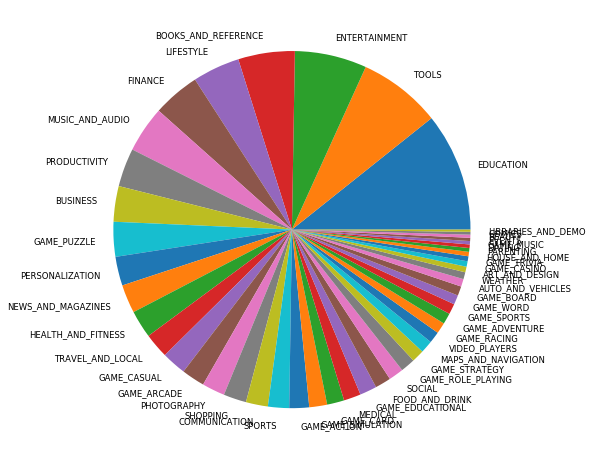

In [10]:
df['Category'].value_counts().plot(kind= 'pie', figsize= (8,10), fontsize=8.5, label='')

In [11]:
df2= df

The data has 33 different categories


C:\Users\oryas\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


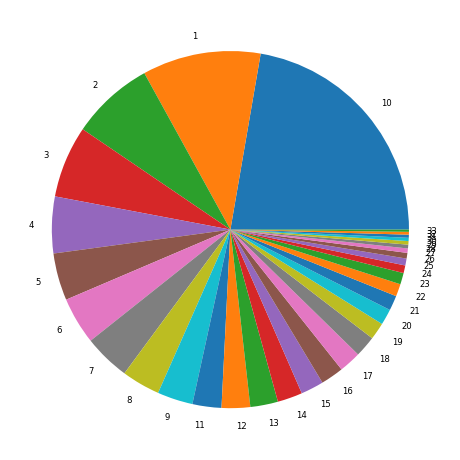

In [12]:
#Preparing the data
#We will combine all the Game categories to one category called 'GAME'.

df2['Category']= df2['Category'].map({
    'EDUCATION': 1,
    'TOOLS': 2,
    'ENTERTAINMENT': 3,
    'BOOKS_AND_REFERENCE': 4,
    'LIFESTYLE': 5,
    'FINANCE': 6,
    'MUSIC_AND_AUDIO': 7,
    'PRODUCTIVITY': 8,
    'BUSINESS': 9,
    'GAME_PUZZLE': 10,
    'PERSONALIZATION': 11,
    'NEWS_AND_MAGAZINES': 12,
    'HEALTH_AND_FITNESS': 13,
    'TRAVEL_AND_LOCAL': 14,
    'GAME_CASUAL': 10,
    'GAME_ARCADE': 10,
    'PHOTOGRAPHY': 15,
    'SHOPPING': 16,
    'COMMUNICATION': 17,
    'SPORTS': 18,
    'GAME_ACTION': 10,
    'GAME_SIMULATION': 10,
    'GAME_CARD': 10,
    'MEDICAL': 19,
    'GAME_EDUCATIONAL': 10,
    'FOOD_AND_DRINK': 20,
    'SOCIAL': 21,
    'GAME_ROLE_PLAYING': 10,
    'GAME_STRATEGY': 10,
    'MAPS_AND_NAVIGATION': 22,
    'VIDEO_PLAYERS': 23,
    'GAME_RACING': 10,
    'GAME_ADVENTURE': 10,
    'GAME_SPORTS': 10,
    'GAME_WORD': 10,
    'GAME_BOARD': 10,
    'AUTO_AND_VEHICLES': 24,
    'WEATHER': 25,
    'ART_AND_DESIGN': 26,
    'GAME_CASINO': 10,
    'GAME_TRIVIA': 10,
    'HOUSE_AND_HOME': 27,
    'PARENTING': 28,
    'DATING': 29,
    'GAME_MUSIC':10,
    'EVENTS': 30,
    'BEAUTY': 31,
    'COMICS': 32,
    'LIBRARIES_AND_DEMO': 33
    })
    

df2['Category'].value_counts().plot(kind= 'pie', figsize= (8,10), fontsize=8.5, label='')
print('The data has', df2['Category'].nunique(), 'different categories')

In [13]:
#We have to change the Rating column to a float data type in order to make predictions.
df2['Rating']= pd.to_numeric(df2['Rating'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31999 entries, 0 to 31999
Data columns (total 11 columns):
App Name           31999 non-null object
Category           31999 non-null int64
Rating             31999 non-null float64
Reviews            31999 non-null float64
Installs           31999 non-null object
Size               31999 non-null object
Price              31999 non-null object
Content Rating     31999 non-null object
Last Updated       31999 non-null object
Minimum Version    31999 non-null object
Latest Version     31999 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 2.9+ MB


C:\Users\oryas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df['Rating'].describe()

count    31999.000000
mean         4.271201
std          0.499626
min          1.000000
25%          4.090909
50%          4.375000
75%          4.583333
max          5.000000
Name: Rating, dtype: float64

In [15]:
#In order to clasiffy the apps' rate we need to have fewer Rating values
df3= df2
df3['Rating']= round(df3['Rating'])
df3

C:\Users\oryas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,20,5.0,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,14,4.0,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,16,4.0,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,20,4.0,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),20,5.0,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
31995,KG Newsroom,12,4.0,8.0,50+,9.6M,0,Everyone,28-Mar-19,4.1 and up,1.1.15
31996,Dedi App 19,10,4.0,71.0,"10,000+",6.5M,0,Everyone,22-Jan-19,4.4 and up,1.0.2274
31997,Dedi App 17,10,4.0,924.0,"100,000+",7.9M,0,Everyone,17-Feb-17,4.0.3 and up,1.1.2043
31998,Right Angle Triangle Solver,2,4.0,1796.0,"100,000+",6.8M,0,Everyone,15-Dec-18,4.1 and up,2.0.5


In [16]:
#We can see there isn't a big difference from before and after we used 'round'
df3['Rating'].describe()

count    31999.000000
mean         4.265821
std          0.630965
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [17]:
df3['Rating'].value_counts()

4.0    18535
5.0    11216
3.0     1861
2.0      312
1.0       75
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Rating ratio')

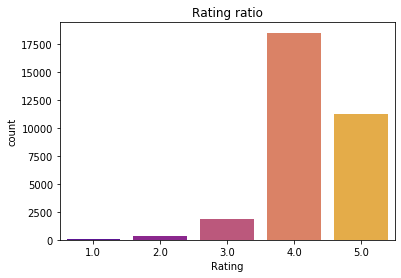

In [18]:
sns.countplot(x="Rating", data=df3, palette='plasma')
plt.title("Rating ratio")

In [19]:
df3['Price'].value_counts()

0          29951
$0.99        354
$1.99        313
$2.99        303
$4.99        233
           ...  
$3.29          1
$12.00         1
$6.71          1
$6.30          1
$3.22          1
Name: Price, Length: 103, dtype: int64

In [20]:
#We will change the Price colum- 0= no payment needed, 1= payment is needed
df3['Price'] = df3['Price'].map({     
        '0': 0
})

df3['Price'].fillna(value=1, inplace=True)

C:\Users\oryas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\oryas\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
#We want to have the Installs numbers as a float data type so we can make predictions
df3['Installs'].value_counts()

100,000+          6745
1,000,000+        5195
10,000+           4590
500,000+          2863
50,000+           2642
1,000+            2342
10,000,000+       1941
5,000,000+        1528
5,000+            1476
100+               961
500+               709
50,000,000+        328
100,000,000+       256
10+                158
50+                153
500,000,000+        33
5+                  28
1,000,000,000+      24
1+                  22
5,000,000,000+       3
0+                   2
Name: Installs, dtype: int64

In [22]:
#Now each value represents the minimum amount of Installs for each app
df3.Installs= df3.Installs.str.replace("+", "")
    
df3['Installs'].value_counts()

C:\Users\oryas\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


100,000          6745
1,000,000        5195
10,000           4590
500,000          2863
50,000           2642
1,000            2342
10,000,000       1941
5,000,000        1528
5,000            1476
100               961
500               709
50,000,000        328
100,000,000       256
10                158
50                153
500,000,000        33
5                  28
1,000,000,000      24
1                  22
5,000,000,000       3
0                   2
Name: Installs, dtype: int64

In [23]:
df3.Installs= df3.Installs.str.replace(",", "")

df3['Installs']= pd.to_numeric(df3['Installs'])

df3['Installs'].describe()

C:\Users\oryas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    3.199900e+04
mean     4.126353e+06
std      5.871817e+07
min      0.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      5.000000e+09
Name: Installs, dtype: float64

In [24]:
#Creating a new feature- I'm assuming the length of the apps' name might affect the rating for some people
# - even unconsciously, since we have no way to not see it when we want to download / use an app
 
df3['name_len']= df3['App Name'].str.len()

C:\Users\oryas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
df3

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,name_len
0,DoorDash - Food Delivery,20,5.0,305034.0,5000000,Varies with device,0.0,Everyone,29-Mar-19,Varies with device,Varies with device,24
1,TripAdvisor Hotels Flights Restaurants Attract...,14,4.0,1207922.0,100000000,Varies with device,0.0,Everyone,29-Mar-19,Varies with device,Varies with device,50
2,Peapod,16,4.0,1967.0,100000,1.4M,0.0,Everyone,20-Sep-18,5.0 and up,2.2.0,6
3,foodpanda - Local Food Delivery,20,4.0,389154.0,10000000,16M,0.0,Everyone,22-Mar-19,4.2 and up,4.18.2,31
4,My CookBook Pro (Ad Free),20,5.0,2291.0,10000,Varies with device,1.0,Everyone,1-Apr-19,Varies with device,Varies with device,25
...,...,...,...,...,...,...,...,...,...,...,...,...
31995,KG Newsroom,12,4.0,8.0,50,9.6M,0.0,Everyone,28-Mar-19,4.1 and up,1.1.15,11
31996,Dedi App 19,10,4.0,71.0,10000,6.5M,0.0,Everyone,22-Jan-19,4.4 and up,1.0.2274,11
31997,Dedi App 17,10,4.0,924.0,100000,7.9M,0.0,Everyone,17-Feb-17,4.0.3 and up,1.1.2043,11
31998,Right Angle Triangle Solver,2,4.0,1796.0,100000,6.8M,0.0,Everyone,15-Dec-18,4.1 and up,2.0.5,27


In [26]:
#I'm assuming that 'App Name', 'Size', 'Content Rating', 'Last Updated', 'Minimum Version' and 'Latest Version' 
# are not going to influence the Rating of the apps, so I won't use them from now on 
df4= df3.drop(columns=['App Name', 'Size', 'Content Rating', 'Last Updated', 'Minimum Version', 'Latest Version' ])

In [27]:
#Because there isn't a way of knowing how many Installs and how many Reviews a new app will have before launching it, 
# we have to drop this columns too
df5= df4.drop(columns=['Reviews','Installs'])

In [28]:
#The final data
df5

,Category,Rating,Price,name_len
0,20,5.0,0.0,24
1,14,4.0,0.0,50
2,16,4.0,0.0,6
3,20,4.0,0.0,31
4,20,5.0,1.0,25
...,...,...,...,...
31995,12,4.0,0.0,11
31996,10,4.0,0.0,11
31997,10,4.0,0.0,11
31998,2,4.0,0.0,27


In [29]:
df5.describe()

,Category,Rating,Price,name_len
count,31999.000000,31999.000000,31999.000000,31999.000000
mean,9.205444,4.265821,0.064002,23.278509
std,6.651245,0.630965,0.244760,12.015545
min,1.000000,1.000000,0.000000,1.000000
25%,4.000000,4.000000,0.000000,14.000000
50%,10.000000,4.000000,0.000000,22.000000
75%,12.000000,5.000000,0.000000,30.000000
max,33.000000,5.000000,1.000000,50.000000


In [30]:
#Splitting the data
X= df5.drop('Rating', axis=1)
y= df5['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
#KNN

#Classification report (evalution), k=1
k= KNeighborsClassifier(n_neighbors=1)
k.fit(X_train,y_train)
predictions= k.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.04      0.03      0.03        95
         3.0       0.12      0.10      0.11       545
         4.0       0.60      0.63      0.62      5536
         5.0       0.41      0.39      0.40      3395

    accuracy                           0.51      9600
   macro avg       0.23      0.23      0.23      9600
weighted avg       0.50      0.51      0.50      9600



In [32]:
#Confusion Matrix, k=1
print(confusion_matrix(y_test, predictions))

[[   0    1    2   15   11]
 [   0    3   13   53   26]
 [   2   10   56  318  159]
 [   4   47  272 3503 1710]
 [   2   16  138 1909 1330]]


In [33]:
#The accuracy is about 0.51, I'll try to get a better result using different k values

In [34]:
#Classification report, k=5
k= KNeighborsClassifier(n_neighbors=5)
k.fit(X_train,y_train)
predictions= k.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        95
         3.0       0.08      0.03      0.04       545
         4.0       0.60      0.76      0.67      5536
         5.0       0.45      0.31      0.37      3395

    accuracy                           0.55      9600
   macro avg       0.23      0.22      0.22      9600
weighted avg       0.51      0.55      0.52      9600



C:\Users\oryas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
#Confusion Matrix, k=5
print(confusion_matrix(y_test, predictions))

[[   0    0    2   23    4]
 [   0    0    9   73   13]
 [   0    1   17  448   79]
 [   0    2  110 4211 1213]
 [   0    0   73 2260 1062]]


In [36]:
#Classification report, k=10
k= KNeighborsClassifier(n_neighbors=10)
k.fit(X_train,y_train)
predictions= k.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        95
         3.0       0.13      0.01      0.02       545
         4.0       0.60      0.82      0.69      5536
         5.0       0.46      0.26      0.33      3395

    accuracy                           0.57      9600
   macro avg       0.24      0.22      0.21      9600
weighted avg       0.51      0.57      0.52      9600



C:\Users\oryas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
#Confusion Matrix, k=10
print(confusion_matrix(y_test, predictions))

[[   0    0    1   24    4]
 [   0    0    3   76   16]
 [   0    0    7  473   65]
 [   0    1   30 4550  955]
 [   0    0   14 2511  870]]


In [38]:
#Classification report, k=15
k= KNeighborsClassifier(n_neighbors=20)
k.fit(X_train,y_train)
predictions= k.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        95
         3.0       0.11      0.00      0.00       545
         4.0       0.60      0.86      0.71      5536
         5.0       0.52      0.26      0.35      3395

    accuracy                           0.59      9600
   macro avg       0.25      0.22      0.21      9600
weighted avg       0.54      0.59      0.53      9600



C:\Users\oryas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
#Confusion Matrix, k=20
print(confusion_matrix(y_test, predictions))

[[   0    0    0   29    0]
 [   0    0    0   89    6]
 [   0    0    1  495   49]
 [   0    0    5 4750  781]
 [   0    0    3 2497  895]]


In [40]:
#After k=20, the accuracy result is staying the same, therefor the optimum k is 20.

#We can see that knn with high k can't predict the rating for the 1, 2 and 3 rating values, which probably means the data
#- doesn't have enough apps with these ratings, therefor we can't get a high amount of 'neighbors' in the test in order 
#- to make this predictions. However the high k has the highest accuracy, since it maneges to get a better prediction
#for the rest of the rating values. 

## KNN result
I found out that the optimum k is 20, and the heighest level of accuracy I got was 0.59.

In [41]:
#Logistic Regression

lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

C:\Users\oryas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oryas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [42]:
#Classification report
print(classification_report(y_test,predictions))

C:\Users\oryas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        95
         3.0       0.00      0.00      0.00       545
         4.0       0.58      0.96      0.73      5536
         5.0       0.55      0.07      0.13      3395

    accuracy                           0.58      9600
   macro avg       0.23      0.21      0.17      9600
weighted avg       0.53      0.58      0.47      9600



In [43]:
#Confusion Matrix
print(confusion_matrix(y_test, predictions))

[[   0    0    0   29    0]
 [   0    0    0   92    3]
 [   0    0    0  537    8]
 [   0    0    0 5339  197]
 [   0    0    0 3142  253]]


In [44]:
#Logistic Regression usualy works best for a binary classification problem (and not multiclass like in this project)
#- That's apparently why the model tried to make predictions for the two most common values in the data
#- The results are similar to the knn predictions.

In [45]:
#Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary
#- dependent variable, although many more complex extensions exist. 

#In the logistic model, the logarithm of the odds for the each value is a linear combination of one or more
#- independent variables. The function that converts log-odds to probability is the logistic function.

## Logistic Regression result
Accuracy was 0.58

In [46]:
#Random Forest

#Creating the model with 100 trees
rf = RandomForestClassifier(n_estimators=100, bootstrap = True)
rf.fit(X_train, y_train)
predictions= rf.predict(X_test)

In [47]:
#Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00        95
         3.0       0.06      0.01      0.01       545
         4.0       0.61      0.83      0.70      5536
         5.0       0.51      0.30      0.38      3395

    accuracy                           0.59      9600
   macro avg       0.24      0.23      0.22      9600
weighted avg       0.54      0.59      0.54      9600



C:\Users\oryas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
#Confusion Matrix
print(confusion_matrix(y_test, predictions))

[[   0    0    0   24    5]
 [   0    0    2   86    7]
 [   0    1    3  480   61]
 [   0    2   28 4614  892]
 [   0    1   20 2361 1013]]


In [49]:
#Like the other models, I think random forest has almost the same accuracy because we don't have enough apps rated 
#- 1, 2 and 3. We can see in the confusion matrix that the predictions for apps rated 4 is the best, probably since we
#- have a high amount of apps to be trained on.

In [50]:
#Random Forest is a model made up of many decision trees. When using a decision tree classifier we will often have 
#- overfitting if the data has high variance. As an alternative to limiting the depth of the tree, which reduces 
#- variance and increases bias, we combine many decision trees into a random forest.

#When training, each tree in a random forest learns from a random sample of the data points. The bootstrapping means 
#- that some samples will be used multiple times in a single tree. The idea is that by training each tree on 
#- different samples, although each tree might have high variance, the entire forest will have lower variance but
#- not at the cost of increasing the bias.

## Random Forest
Accuracy was 0.59

## Model scores

In [51]:
#knn
k.score(X_test,y_test)

0.588125

In [52]:
k.score(X_train,y_train)

0.6131970177240056

In [53]:
#Logistic Regression
lr.score(X_test,y_test)

0.5825

In [54]:
lr.score(X_train,y_train)

0.5829724541274164

In [55]:
#Random Forest
rf.score(X_test,y_test)

0.5864583333333333

In [56]:
rf.score(X_train,y_train)

0.6393588999508907

## Conclusions
After learning the data, cleaning and preparing it for the predictions, and using a few classifiers, I belive that the data doesn't contain enough information in order to get a good prediction about what is most likely to be the app's rating.
I think some very important information is missing, and if we had a way of getting it the predictions would have been better (like if we had the ability to know how many installs and how many reviews a new app will have) . For example- 
1. Averge time the app is staying in users phone.
2. Averge number of times users open the app in a week.
3. Averge amount of time users spend in the app each time they open it.